Thực hiện tìm các contour trong ảnh và xác định đối tượng

In [165]:
import numpy as np
import cv2 as cv 
import matplotlib.pyplot as plt

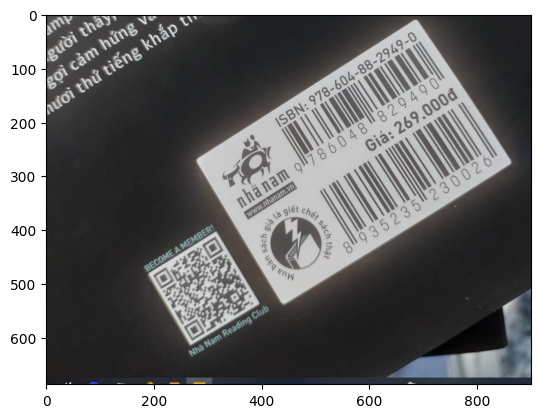

In [166]:
img = cv.imread('barcode/barcode3.jpg')
#Convert to grayscale
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(img)
plt.show()

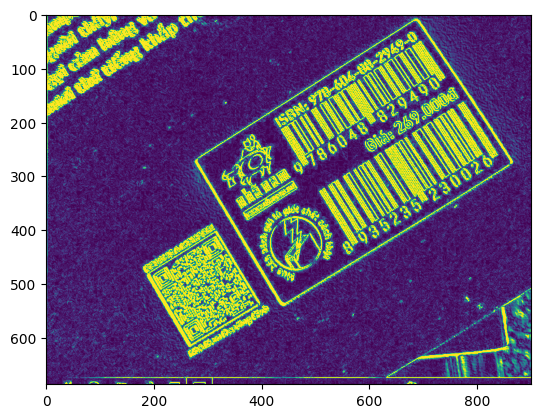

In [167]:
#calculate x & y gradient
gradX = cv.Sobel(img_gray, ddepth = cv.CV_32F, dx = 1, dy = 0, ksize = -1)
gradY = cv.Sobel(img_gray, ddepth = cv.CV_32F, dx = 0, dy = 1, ksize = -1)

# subtract the y-gradient from the x-gradient
gradient = cv.subtract(gradX, gradY)
gradient = cv.convertScaleAbs(gradient)

plt.imshow(gradient)
plt.show()

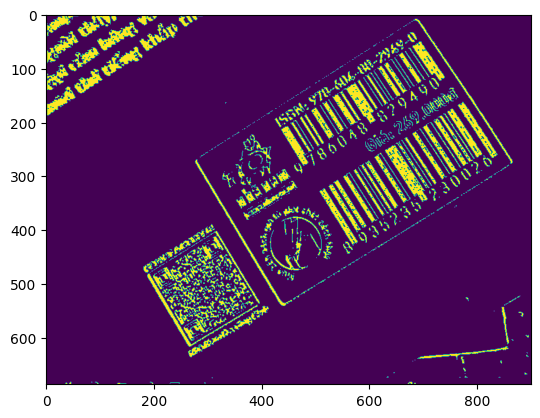

In [168]:
# blur the image
blurred = cv.blur(gradient, (3, 3))

# threshold the image
(_, thresh) = cv.threshold(blurred, 225, 255, cv.THRESH_BINARY)

plt.imshow(thresh)
plt.show()

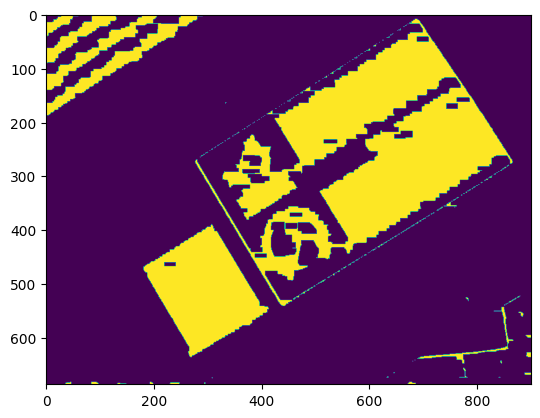

In [169]:
# construct a closing kernel and apply it to the thresholded image
kernel = cv.getStructuringElement(cv.MORPH_RECT, (21, 7))
closed = cv.morphologyEx(thresh, cv.MORPH_CLOSE, kernel)

plt.imshow(closed)
plt.show()

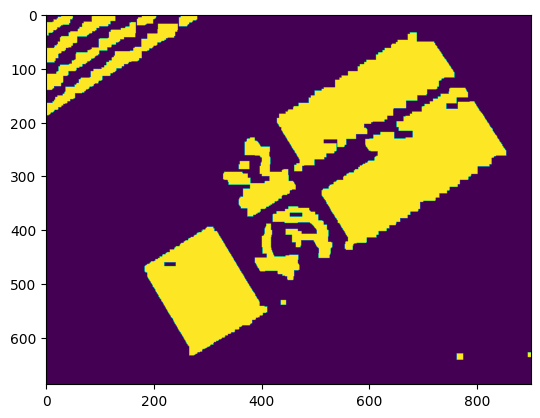

In [170]:
# perform a series of erosions and dilations
closed = cv.erode(closed, None, iterations = 4)
closed = cv.dilate(closed, None, iterations = 4)

plt.imshow(closed)
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_14308\2819816749.py:10: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(cv.boxPoints(rect))
C:\Users\DELL\AppData\Local\Temp\ipykernel_14308\2819816749.py:12: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box1 = np.int0(cv.boxPoints(rect1))


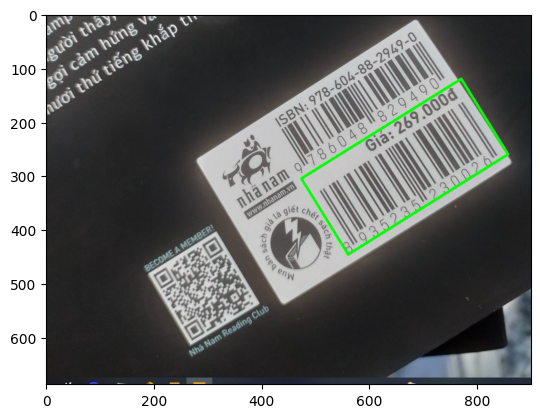

In [171]:
# find the contours in the thresholded image, then sort the contours
# by their area, keeping only the largest one
cnts,hierarchy = cv.findContours(closed.copy(), cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)[-2:]

c = sorted(cnts, key = cv.contourArea, reverse = True)[0]
c1 = sorted(cnts, key = cv.contourArea, reverse = True)[1]

# compute the rotated bounding box of the largest contour
rect = cv.minAreaRect(c)
box = np.int0(cv.boxPoints(rect))
rect1 = cv.minAreaRect(c1)
box1 = np.int0(cv.boxPoints(rect1))

# draw a bounding box arounded the detected barcode and display the
# image
cv.drawContours(img, [box], -1, (0, 255, 0), 3)
# cv.drawContours(img, [box1], -1, (0, 255, 0), 3)

plt.imshow(img, cmap='gray')
plt.show()